<a href="https://colab.research.google.com/github/sowmya2k4/Prediction-of-musculoskeletal-health/blob/main/FINAL_YEAR_PROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **IMPORTING LIBRARIES**

# **Presentation link:**https://docs.google.com/presentation/d/1l5ZUwqe9seURY-xU9MIV76E1QBJcV6mt/edit?usp=sharing&ouid=108716214479124452023&rtpof=true&sd=true


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split

In [ ]:
df = pd.read_csv("finalproj.csv")
df

,GENDER,AGE,MODE_OF_WORKING,WORKOUT,AVE_WORKING_HOURS_PER_DAY,Posture - A,Posture - B\n,Posture - C\n,Posture - E\n,Posture - F\n,Posture - G\n,Posture - H\n,Posture - I\n,Posture - J\n,Posture - K\n,Posture - L\n,ORGAN_AFFECTED,DOCTOR_CONSULTED,DURATION
0,Male,56-65,Work from office,No,6 hours,NaN,Neck pain,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Neck pain,Neurologists,5 year
1,Male,56-65,Hybrid(Depends on your call),No,8 hours,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Back pain,NaN,Back pain,Spinal specialists,6 + years
2,Male,36-45,Work from office,Yes,8 hours,"Shoulder pain, Eyes burn","Neck pain, Shoulder pain, Eyes burn","Neck pain, Shoulder pain, Eyes burn","Neck pain, Shoulder pain, Eyes burn","Neck pain, Back pain, Shoulder pain, Eyes burn","Neck pain, Back pain, Shoulder pain, Eyes burn...","Neck pain, Back pain, Shoulder pain, Eyes burn","Neck pain, Back pain, Shoulder pain, Eyes burn","Neck pain, Back pain, Shoulder pain, Eyes burn","Neck pain, Back pain, Shoulder pain, Eyes burn","Neck pain, Back pain, Shoulder pain, Eyes burn",Eye burn,Neurologists,6 + years
3,Male,36-45,Work from office,Yes,8 hours,"Neck pain, Back pain, Hands pain, Joins pain, ...","Neck pain, Back pain, Hands pain, Eyes burn","Neck pain, Back pain, Hands pain, Joins pain, ...","Neck pain, Back pain, Hands pain, Eyes burn","Neck pain, Back pain, Hands pain, Joins pain","Neck pain, Back pain, Hands pain, Eyes burn","Neck pain, Back pain, Hands pain, Eyes burn","Neck pain, Back pain, Hands pain, Eyes burn","Neck pain, Back pain, Hands pain, Joins pain","Neck pain, Back pain, Hands pain, Eyes burn","Neck pain, Back pain, Hands pain, Eyes burn",Hands pain,Spinal specialists,2 years
4,Female,26-35,Work from office,No,7 hours,"Neck pain, Back pain, Shoulder pain, Eyes burn","Neck pain, Back pain, Shoulder pain, Joins pai...","Neck pain, Back pain, Shoulder pain","Neck pain, Back pain, Shoulder pain, Eyes burn","Neck pain, Back pain, Shoulder pain, Joins pain","Neck pain, Back pain, Shoulder pain, Hands pai...","Neck pain, Back pain, Joins pain","Neck pain, Back pain, Shoulder pain, Hands pai...","Neck pain, Back pain, Shoulder pain","Neck pain, Back pain, Shoulder pain, Hands pai...","Neck pain, Back pain, Shoulder pain, Joins pai...",Eye burn,Spinal specialists,3 years
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197,Female,18-25,Work from home,No,9 hours,"Back pain, Eyes burn","Back pain, Eyes burn","Back pain, Eyes burn","Back pain, Eyes burn","Back pain, Eyes burn","Back pain, Eyes burn","Back pain, Eyes burn","Back pain, Knee pain","Back pain, Eyes burn","Back pain, Eyes burn","Back pain, Eyes burn",NaN,Spinal specialists,1 year
198,Male,36-45,Work from office,No,10hours,"Neck pain, Back pain, Shoulder pain","Shoulder pain, Joins pain, Eyes burn","Neck pain, Back pain, Shoulder pain, Hands pain","Back pain, Shoulder pain, Hands pain","Back pain, Hands pain, Eyes burn","Neck pain, Shoulder pain, Hands pain","Neck pain, Shoulder pain, Joins pain","Shoulder pain, Joins pain, Eyes burn, Knee pain","Back pain, Shoulder pain, Joins pain","Back pain, Shoulder pain, Eyes burn","Back pain, Hands pain",Knee pain,Spinal specialists,3 years
199,Female,26-35,Work from office,No,10hours,"Neck pain, Back pain, Shoulder pain, Eyes burn","Neck pain, Back pain, Shoulder pain","Neck pain, Back pain","Neck pain, Back pain, Eyes burn","Neck pain, Shoulder pain, Eyes burn","Neck pain, Eyes burn","Neck pain, Back pain","Joins pain, Eyes burn","Neck pain, Back pain, Eyes burn",Neck pain,"Neck pain, Back pain, Shoulder pain",Shoulder pain,Spinal specialists,Less than a year
200,Female,18-25,Work from office,No,9 hours,Neck pain,Neck pain,Neck pain,Neck pain,Neck pain,Neck pain,Neck pain,Neck pain,Neck pain,Neck pain,Neck pain,Eye burn,Ophthalmologist,2 years


In [ ]:
df.shape

(202, 19)

In [ ]:
df.tail()

,GENDER,AGE,MODE_OF_WORKING,WORKOUT,AVE_WORKING_HOURS_PER_DAY,Posture - A,Posture - B\n,Posture - C\n,Posture - E\n,Posture - F\n,Posture - G\n,Posture - H\n,Posture - I\n,Posture - J\n,Posture - K\n,Posture - L\n,ORGAN_AFFECTED,DOCTOR_CONSULTED,DURATION
197,Female,18-25,Work from home,No,9 hours,"Back pain, Eyes burn","Back pain, Eyes burn","Back pain, Eyes burn","Back pain, Eyes burn","Back pain, Eyes burn","Back pain, Eyes burn","Back pain, Eyes burn","Back pain, Knee pain","Back pain, Eyes burn","Back pain, Eyes burn","Back pain, Eyes burn",NaN,Spinal specialists,1 year
198,Male,36-45,Work from office,No,10hours,"Neck pain, Back pain, Shoulder pain","Shoulder pain, Joins pain, Eyes burn","Neck pain, Back pain, Shoulder pain, Hands pain","Back pain, Shoulder pain, Hands pain","Back pain, Hands pain, Eyes burn","Neck pain, Shoulder pain, Hands pain","Neck pain, Shoulder pain, Joins pain","Shoulder pain, Joins pain, Eyes burn, Knee pain","Back pain, Shoulder pain, Joins pain","Back pain, Shoulder pain, Eyes burn","Back pain, Hands pain",Knee pain,Spinal specialists,3 years
199,Female,26-35,Work from office,No,10hours,"Neck pain, Back pain, Shoulder pain, Eyes burn","Neck pain, Back pain, Shoulder pain","Neck pain, Back pain","Neck pain, Back pain, Eyes burn","Neck pain, Shoulder pain, Eyes burn","Neck pain, Eyes burn","Neck pain, Back pain","Joins pain, Eyes burn","Neck pain, Back pain, Eyes burn",Neck pain,"Neck pain, Back pain, Shoulder pain",Shoulder pain,Spinal specialists,Less than a year
200,Female,18-25,Work from office,No,9 hours,Neck pain,Neck pain,Neck pain,Neck pain,Neck pain,Neck pain,Neck pain,Neck pain,Neck pain,Neck pain,Neck pain,Eye burn,Ophthalmologist,2 years
201,Female,18-25,Work from home,Yes,6 hours,Neck pain,"Neck pain, Shoulder pain",NaN,NaN,Shoulder pain,NaN,NaN,NaN,NaN,NaN,NaN,Neck pain,Orthopedic,1 year




---



---
# **DATA ANALYSIS**


In [ ]:
df.dtypes

GENDER                       object
AGE                          object
MODE_OF_WORKING              object
WORKOUT                      object
AVE_WORKING_HOURS_PER_DAY    object
Posture - A                  object
Posture - B\n                object
Posture - C\n                object
Posture - E\n                object
Posture - F\n                object
Posture - G\n                object
Posture - H\n                object
Posture - I\n                object
Posture - J\n                object
Posture - K\n                object
Posture - L\n                object
ORGAN_AFFECTED               object
DOCTOR_CONSULTED             object
DURATION                     object
dtype: object

All the data is of string type .

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202 entries, 0 to 201
Data columns (total 19 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   GENDER                     202 non-null    object
 1   AGE                        202 non-null    object
 2   MODE_OF_WORKING            202 non-null    object
 3   WORKOUT                    202 non-null    object
 4   AVE_WORKING_HOURS_PER_DAY  202 non-null    object
 5   Posture - A                180 non-null    object
 6   Posture - B
               177 non-null    object
 7   Posture - C
               151 non-null    object
 8   Posture - E
               168 non-null    object
 9   Posture - F
               177 non-null    object
 10  Posture - G
               139 non-null    object
 11  Posture - H
               137 non-null    object
 12  Posture - I
               136 non-null    object
 13  Posture - J
               165 non-null    object
 14  Posture - 

In [ ]:
df.describe()

,GENDER,AGE,MODE_OF_WORKING,WORKOUT,AVE_WORKING_HOURS_PER_DAY,Posture - A,Posture - B\n,Posture - C\n,Posture - E\n,Posture - F\n,Posture - G\n,Posture - H\n,Posture - I\n,Posture - J\n,Posture - K\n,Posture - L\n,ORGAN_AFFECTED,DOCTOR_CONSULTED,DURATION
count,202,202,202,202,202,180,177,151,168,177,139,137,136,165,134,142,174,157,145
unique,2,5,3,2,7,36,44,38,43,39,41,41,50,44,42,36,7,4,8
top,Female,18-25,Work from office,Yes,8 hours,Back pain,Back pain,Back pain,Back pain,Neck pain,Back pain,Joins pain,Knee pain,"Neck pain, Back pain, Shoulder pain, Hands pai...",Neck pain,Neck pain,Joins pain,Orthopedic,Less than a year
freq,105,102,92,107,60,26,26,28,15,28,18,18,19,12,26,28,30,42,50


Mostly females aged 18-25 who are working from the office are affected. They have eye burns and most of them consult orthopedic. They are suffering for a year.

In [ ]:
df.isnull().sum()

GENDER                        0
AGE                           0
MODE_OF_WORKING               0
WORKOUT                       0
AVE_WORKING_HOURS_PER_DAY     0
Posture - A                  22
Posture - B\n                25
Posture - C\n                51
Posture - E\n                34
Posture - F\n                25
Posture - G\n                63
Posture - H\n                65
Posture - I\n                66
Posture - J\n                37
Posture - K\n                68
Posture - L\n                60
ORGAN_AFFECTED               28
DOCTOR_CONSULTED             45
DURATION                     57
dtype: int64

In [ ]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
197    False
198    False
199    False
200    False
201    False
Length: 202, dtype: bool

Dataset has no duplicate values

---



---
# **EDA**



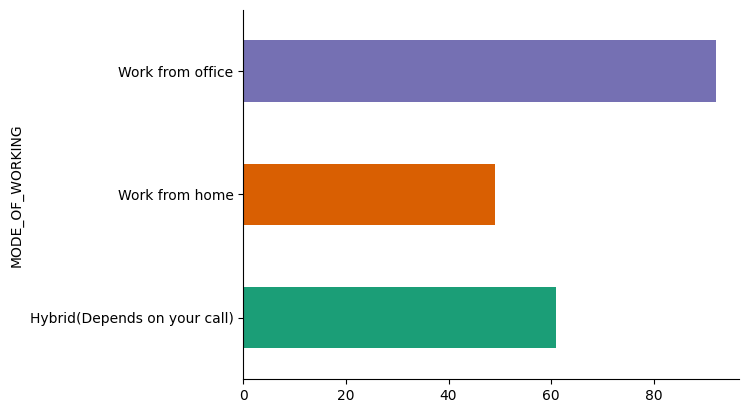

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('MODE_OF_WORKING').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

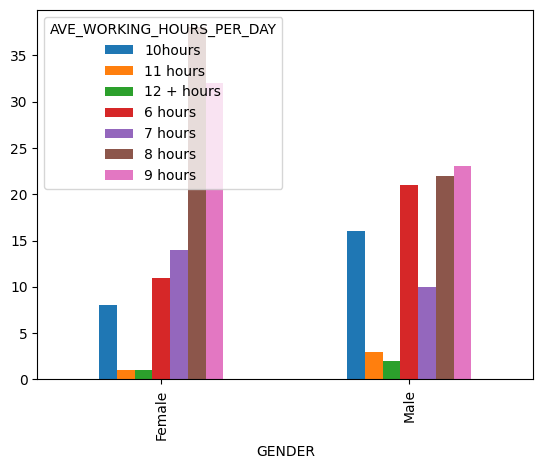

In [ ]:
df.groupby(['GENDER', 'AVE_WORKING_HOURS_PER_DAY']).size().unstack().plot(kind='bar').figsize = (12,12)

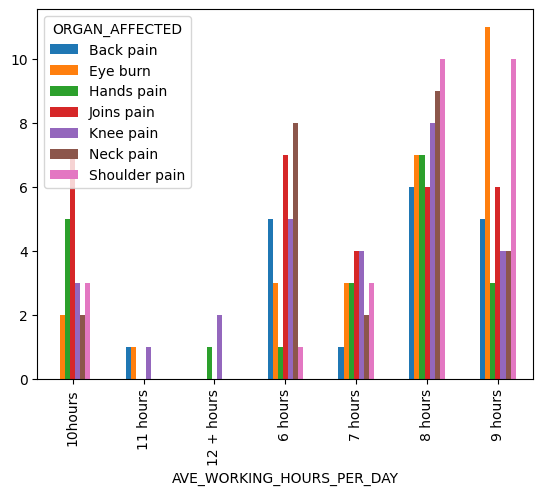

In [ ]:
df.groupby([ 'AVE_WORKING_HOURS_PER_DAY','ORGAN_AFFECTED']).size().unstack().plot(kind='bar').figsize = (12,12)

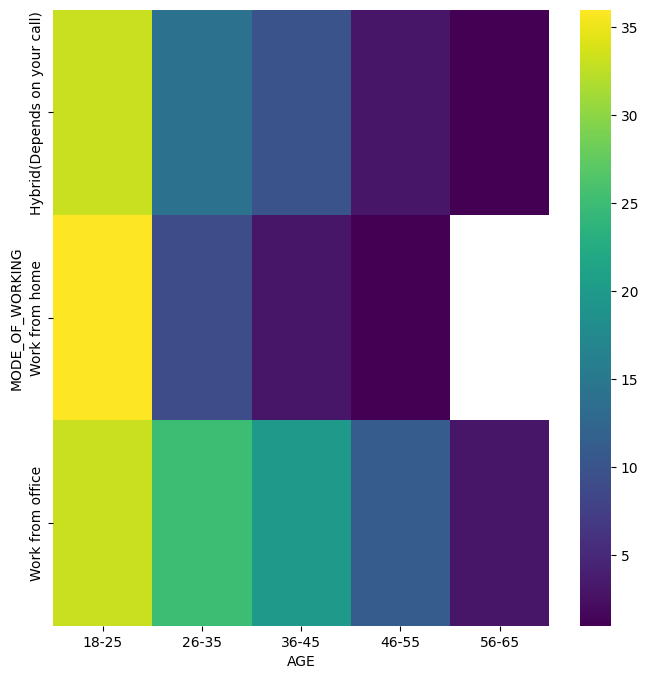

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['MODE_OF_WORKING'].value_counts()
    for x_label, grp in df.groupby('AGE')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('AGE')
_ = plt.ylabel('MODE_OF_WORKING')

<ipython-input-84-8bd2c95b088f>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='DURATION', data=df, palette='viridis')


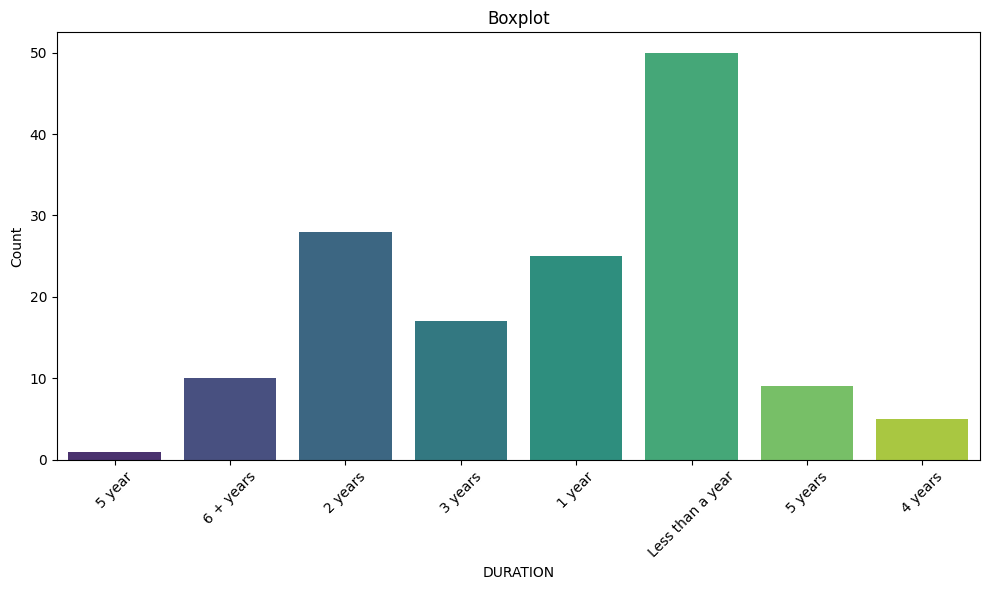

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='DURATION', data=df, palette='viridis')
plt.title('Boxplot')
plt.xlabel('DURATION')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

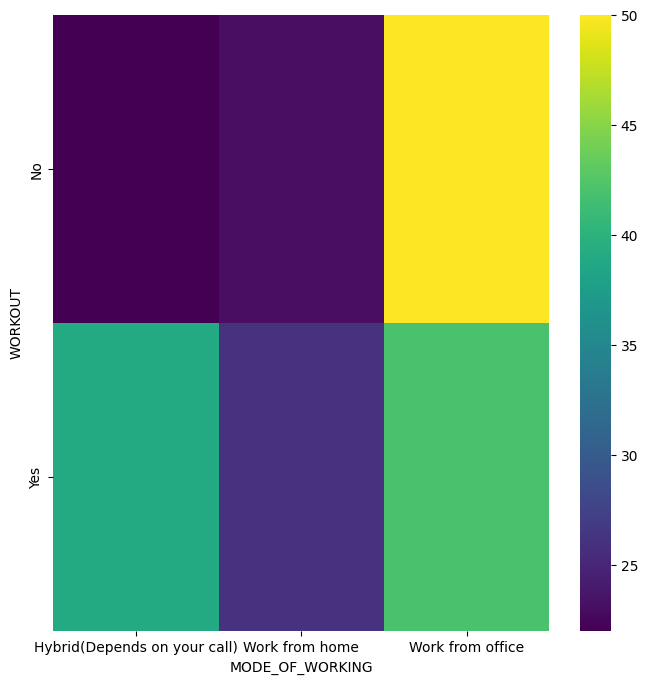

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['WORKOUT'].value_counts()
    for x_label, grp in df.groupby('MODE_OF_WORKING')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('MODE_OF_WORKING')
_ = plt.ylabel('WORKOUT')

<Axes: xlabel='GENDER'>

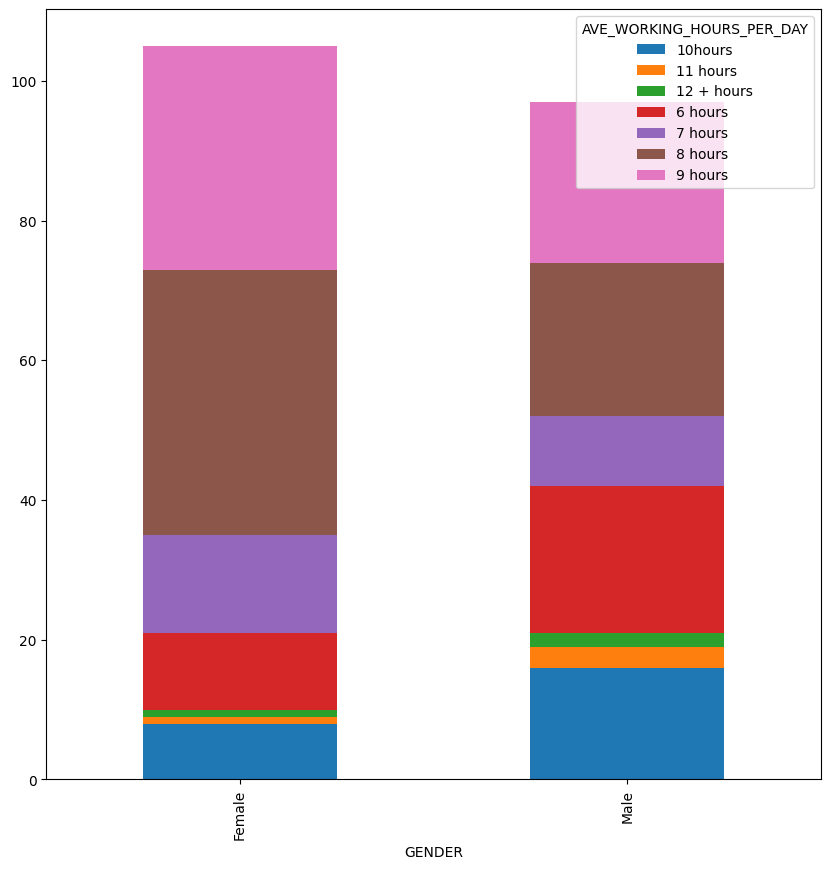

In [ ]:
df.groupby(['GENDER', 'AVE_WORKING_HOURS_PER_DAY']).size().unstack().plot(kind='bar', stacked=True,figsize=(10,10))



---



---

#**DUMMY VARIABLE ENCODING**

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoders = {}
le = LabelEncoder()
for col in df.columns:
    label_encoders[col] = LabelEncoder()
    df.loc[:, col] = label_encoders[col].fit_transform(df[col])
df.head()

,GENDER,AGE,MODE_OF_WORKING,WORKOUT,AVE_WORKING_HOURS_PER_DAY,Posture - A,Posture - B\n,Posture - C\n,Posture - E\n,Posture - F\n,Posture - G\n,Posture - H\n,Posture - I\n,Posture - J\n,Posture - K\n,Posture - L\n,ORGAN_AFFECTED,DOCTOR_CONSULTED,DURATION
0,1,4,2,0,3,36,15,38,43,39,41,41,50,44,42,36,5,0,4
1,1,4,0,0,5,36,44,38,43,39,41,41,50,44,0,36,0,3,6
2,1,2,2,1,5,33,35,30,33,22,25,24,29,24,24,22,1,0,6
3,1,2,2,1,5,17,19,20,18,20,20,21,26,21,21,18,2,3,1
4,0,1,2,0,4,20,29,22,21,27,27,22,33,23,26,26,1,3,2


# **HEAT MAP ANALYSIS**

In [ ]:
data = df.corr().fillna(0)
data.round(0)

,GENDER,AGE,MODE_OF_WORKING,WORKOUT,AVE_WORKING_HOURS_PER_DAY,Posture - A,Posture - B\n,Posture - C\n,Posture - E\n,Posture - F\n,Posture - G\n,Posture - H\n,Posture - I\n,Posture - J\n,Posture - K\n,Posture - L\n,ORGAN_AFFECTED,DOCTOR_CONSULTED,DURATION
GENDER,1.0,-0.0,-0.0,0.0,-0.0,0.0,0.0,-0.0,-0.0,0.0,0.0,0.0,0.0,-0.0,0.0,-0.0,0.0,0.0,-0.0
AGE,-0.0,1.0,0.0,-0.0,-0.0,0.0,-0.0,0.0,0.0,0.0,-0.0,0.0,-0.0,0.0,-0.0,-0.0,-0.0,-0.0,-0.0
MODE_OF_WORKING,-0.0,0.0,1.0,-0.0,0.0,-0.0,-0.0,0.0,0.0,-0.0,-0.0,0.0,-0.0,-0.0,0.0,-0.0,-0.0,-0.0,-0.0
WORKOUT,0.0,-0.0,-0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AVE_WORKING_HOURS_PER_DAY,-0.0,-0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.0,0.0,0.0,0.0,0.0
Posture - A,0.0,0.0,-0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Posture - B\n,0.0,-0.0,-0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.0
Posture - C\n,-0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Posture - E\n,-0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.0,0.0,-0.0
Posture - F\n,0.0,0.0,-0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.0


<Axes: >

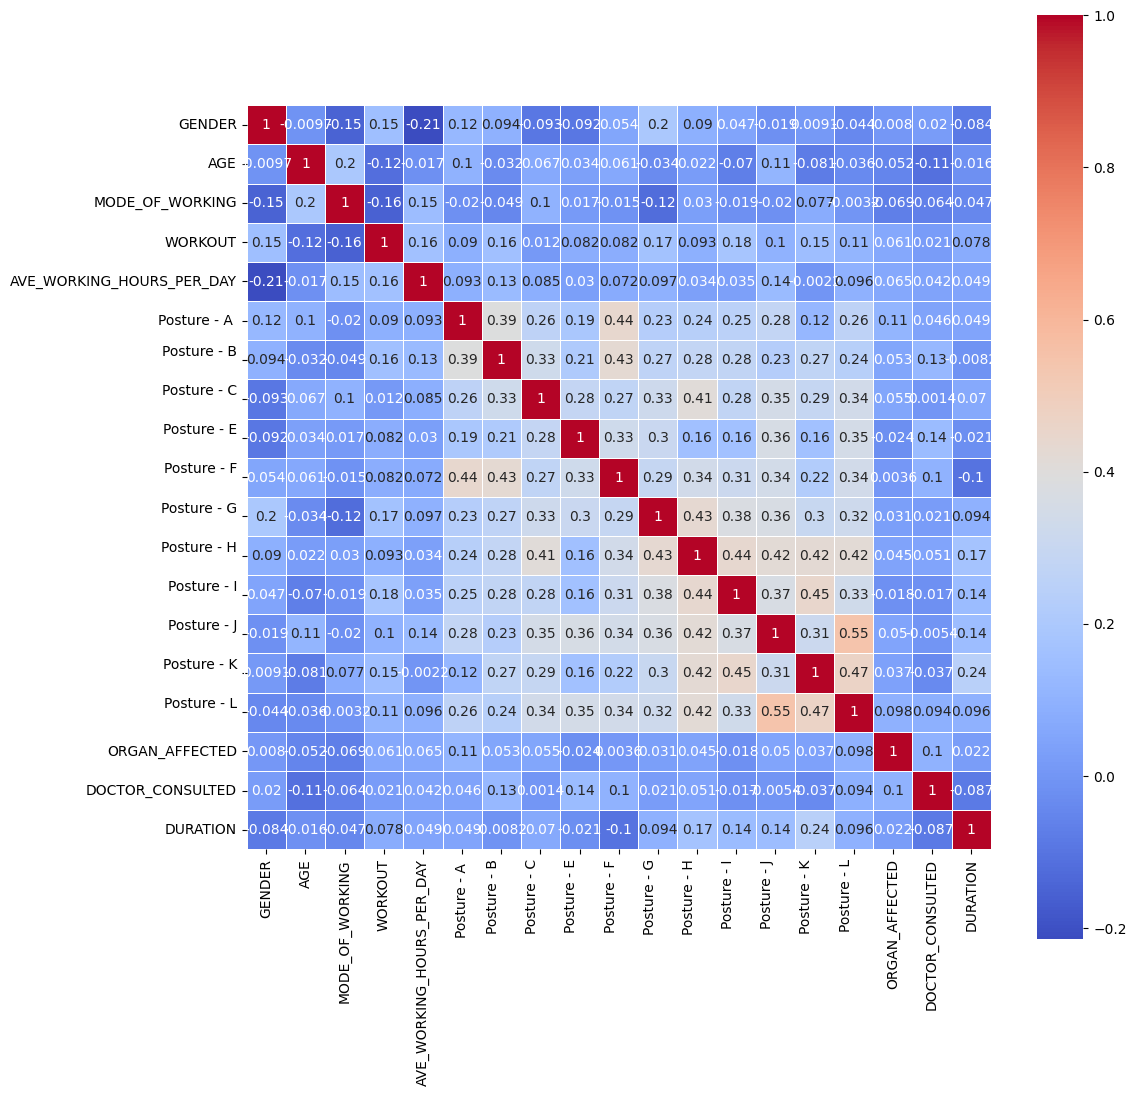

In [ ]:
fig, ax = plt.subplots(figsize = (12,12))
sns.heatmap(data, cmap ="coolwarm" ,square= True, linewidth = 0.5 ,annot =  True)

# **VIF**

In [ ]:
!pip install missingno
import missingno as msno

<Axes: >

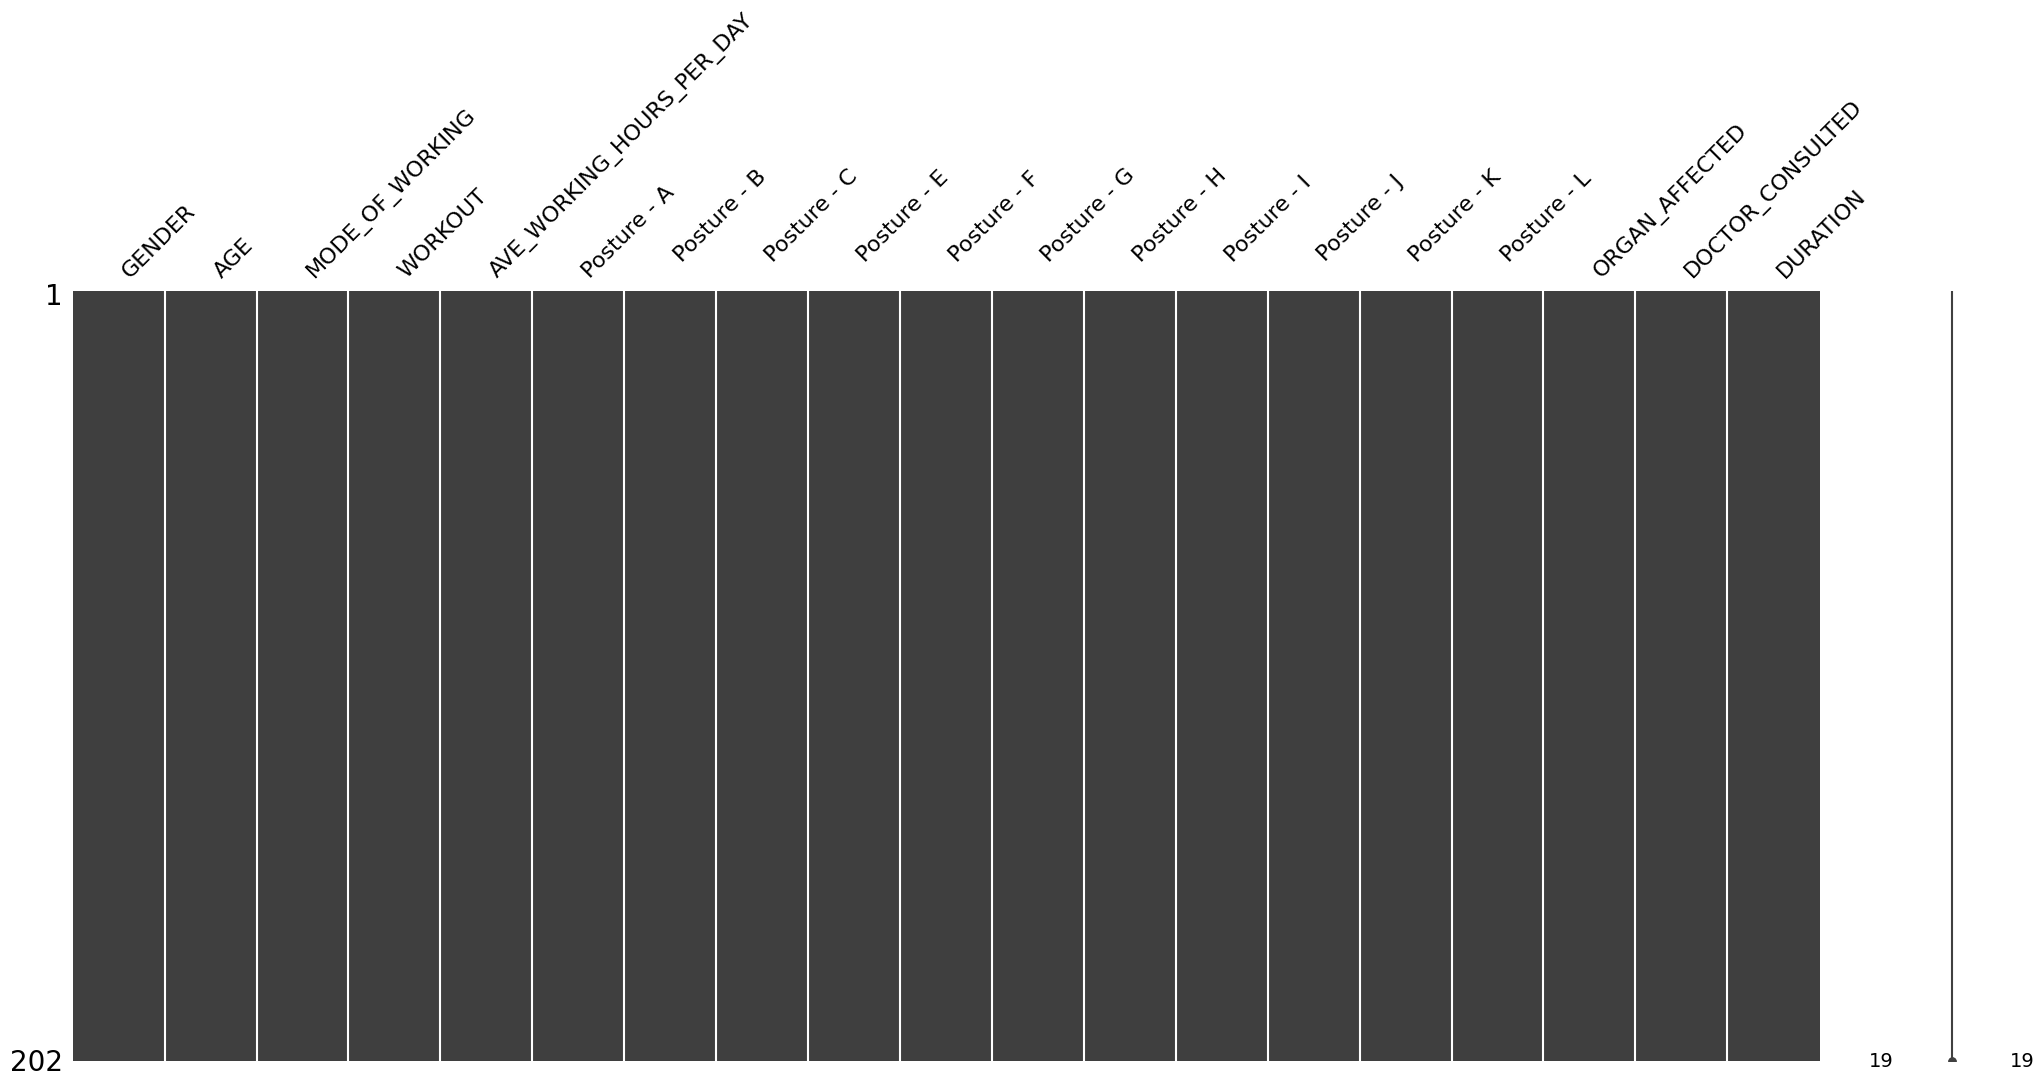

In [ ]:
msno.matrix(df)

In [ ]:
df.isnull().sum()

GENDER                       0
AGE                          0
MODE_OF_WORKING              0
WORKOUT                      0
AVE_WORKING_HOURS_PER_DAY    0
Posture - A                  0
Posture - B\n                0
Posture - C\n                0
Posture - E\n                0
Posture - F\n                0
Posture - G\n                0
Posture - H\n                0
Posture - I\n                0
Posture - J\n                0
Posture - K\n                0
Posture - L\n                0
ORGAN_AFFECTED               0
DOCTOR_CONSULTED             0
DURATION                     0
dtype: int64

In [ ]:
df = df.fillna(0)
vif = pd.DataFrame()
vif['features'] = df.columns
vif['vif_value'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
vif = vif.sort_values(by="vif_value", ascending=True)
vif

,features,vif_value
1,AGE,1.825340
0,GENDER,2.157740
3,WORKOUT,2.471500
2,MODE_OF_WORKING,3.101356
17,DOCTOR_CONSULTED,3.198529
16,ORGAN_AFFECTED,3.573941
18,DURATION,3.652301
6,Posture - B\n,4.378998
5,Posture - A,4.443124
7,Posture - C\n,4.494640


# **MODEL SPLTTING**

In [ ]:
x = df.drop(['ORGAN_AFFECTED','DOCTOR_CONSULTED'] , axis = 1 )
y = df['ORGAN_AFFECTED']

# **MODEL FITTING**

**LINEAR REGRESSOR**

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 1)
x_train.shape, x_test.shape
from sklearn.linear_model import LinearRegression
from sklearn import metrics
lm = LinearRegression()
lm.fit(x_train,y_train)
y_pred = lm.predict(x_test)
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 1.8181285708406982
RMSE: 2.1033871127913706


**KNN**

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 1)
x_train.shape, x_test.shape
from sklearn.neighbors import KNeighborsRegressor
from sklearn import metrics
knn = KNeighborsRegressor(n_neighbors=8)
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 1.6311475409836065
RMSE: 1.9816008183483091


**SVM**

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 1)
x_train.shape, x_test.shape
from sklearn.svm import SVR
from sklearn import metrics
svr = SVR(kernel = 'rbf')
svr.fit(x_train, y_train)
y_pred = svr.predict(x_test)
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 1.675654602710314
RMSE: 2.064207160038848


**DECISION TREES**

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 1)
x_train.shape, x_test.shape
from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics
clf = DecisionTreeRegressor()
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 2.658536585365854
RMSE: 3.272203702884454


**RANDOM FOREST**

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 1)
x_train.shape, x_test.shape
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
rfr = RandomForestRegressor(n_estimators=100, random_state=42)
rfr.fit(x_train, y_train)
y_pred = rfr.predict(x_test)
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 1.6947058823529413
RMSE: 2.095487682486103


**GRADIENT BOOSTING**

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.15, random_state = 1)
x_train.shape, x_test.shape
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import metrics
gbr = GradientBoostingRegressor(n_estimators=1000, learning_rate=0.3, max_depth=3)
gbr.fit(x_train, y_train)
y_pred = gbr.predict(x_test)
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 2.0861539108878238
RMSE: 2.585087940775633


**XG BOOSTING**

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 1)
x_train.shape, x_test.shape
from xgboost import XGBRegressor
from sklearn import metrics
xg = XGBRegressor(n_estimators=1000, learning_rate=0.1)
xg.fit(x_train, y_train)
y_pred = xg.predict(x_test)
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 1.7431212172788733
RMSE: 2.2470398353266785


**ADA BOOST**

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 1)
x_train.shape, x_test.shape
from sklearn.ensemble import AdaBoostRegressor
from sklearn import metrics
adaboost_model = AdaBoostRegressor(n_estimators=1000,learning_rate=0.1)
adaboost_model.fit(x_train, y_train)
y_pred = adaboost_model.predict(x_test)
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 1.7414933302945141
RMSE: 2.0859155614516696


**BAGGING**

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 1)
x_train.shape, x_test.shape
from sklearn.ensemble import BaggingRegressor
from sklearn import metrics
base_regressor = DecisionTreeRegressor(random_state=42)
bagging_model = BaggingRegressor(base_regressor, n_estimators=1000)
bagging_model.fit(x_train, y_train)
y_pred = bagging_model.predict(x_test)
print('MAE', metrics.mean_absolute_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE 1.6898524590163935
RMSE: 2.082092504362213


**NEURAL NETWORKS**

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 1)
x_train.shape, x_test.shape
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

def build_model():
    model = models.Sequential([
        layers.Dense(19, activation='linear', input_shape=(x_train.shape[1],)),
        layers.Dense(12, activation='linear'),
        layers.Dense(8, activation='linear'),
        layers.Dense(1)  # No activation for regression
    ])

    model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])
    return model

model = build_model()
history = model.fit(x_train, y_train, epochs=100, batch_size = 10, validation_split = 0.1)
test_mse_score, test_mae_score = model.evaluate(x_test, y_test)
print(f"Test MSE: {test_mse_score}\nTest MAE: {test_mae_score}")

Epoch 1/100
13/13 [==============================] - 1s 19ms/step - loss: 24.8688 - mae: 4.1622 - val_loss: 19.6572 - val_mae: 3.9446
Epoch 2/100
13/13 [==============================] - 0s 5ms/step - loss: 20.9579 - mae: 3.8436 - val_loss: 17.2644 - val_mae: 3.7138
Epoch 3/100
13/13 [==============================] - 0s 5ms/step - loss: 18.6187 - mae: 3.6293 - val_loss: 16.0329 - val_mae: 3.5447
Epoch 4/100
13/13 [==============================] - 0s 5ms/step - loss: 17.1170 - mae: 3.4544 - val_loss: 15.2288 - val_mae: 3.4030
Epoch 5/100
13/13 [==============================] - 0s 4ms/step - loss: 15.8703 - mae: 3.3156 - val_loss: 14.3329 - val_mae: 3.2559
Epoch 6/100
13/13 [==============================] - 0s 5ms/step - loss: 14.7739 - mae: 3.1797 - val_loss: 13.5846 - val_mae: 3.1291
Epoch 7/100
13/13 [==============================] - 0s 7ms/step - loss: 13.7296 - mae: 3.0505 - val_loss: 12.7141 - val_mae: 3.0442
Epoch 8/100
13/13 [==============================] - 0s 4ms/step - l

In [ ]:
predictions = model.predict(x_test)
print(predictions.flatten())

2/2 [==============================] - 0s 9ms/step
[3.3860862 3.6524262 4.6893506 3.666127  3.359254  3.2393992 5.6178803
 4.244004  3.304598  3.7165754 3.7640288 4.2183857 2.3310673 4.353174
 3.5077674 4.0777736 3.755489  3.4414098 4.1215477 3.6788433 3.5526955
 4.2878995 3.052624  4.1373496 4.3469534 3.5444477 3.765365  3.518791
 2.732456  3.5869153 3.7282414 3.6871617 3.7415295 3.2987192 3.6623204
 3.9779146 4.0421734 3.7907217 4.5719724 3.8532484 4.2743945 2.6522193
 4.2368503 3.2706692 2.1901052 3.2213027 3.2607324 3.5993435 4.742452
 4.3403373 3.9990935 3.9858112 4.4666805 2.5278103 3.2827857 3.2784932
 4.1963863 5.5696177 3.563794  4.422118  3.2433186]


In [ ]:
model.summary();

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 19)                342       
                                                                 
 dense_9 (Dense)             (None, 12)                240       
                                                                 
 dense_10 (Dense)            (None, 8)                 104       
                                                                 
 dense_11 (Dense)            (None, 1)                 9         
                                                                 
Total params: 695 (2.71 KB)
Trainable params: 695 (2.71 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


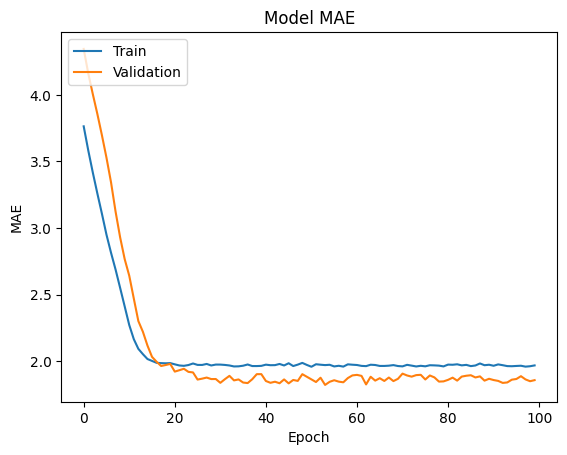

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['mae'])
plt.plot(history.history['val_mae'])
plt.title('Model MAE')
plt.ylabel('MAE')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()